<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Logistic_Regression_to_predict_Chance_of_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task:** To predict chance of Admission based on Exams Score Using Logistic Regression

In [1]:
import numpy as np              # used for perform mathematical operation 
import matplotlib.pyplot as plt        #used for ploting 
import pandas as pd             # used for read all files

In [2]:
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [5]:
# Read data from csv file
dataset=pd.read_csv("Admission_Predict.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
dataset.shape

(400, 9)

In [7]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
# Split dataset for Training and Testing
train_set = dataset.sample(frac=0.80,random_state=0)     # Training = 80%  
test_set = dataset.drop(train_set.index)                # Testing =20%

In [9]:
# Taking Important Feature from all feature
# I have taken GRE, TOEFL, CGPA score..
x_train = train_set.values[:,[1,2,6]]
y_train = train_set.values[:,-1]

x_test = test_set.values[:,[1,2,6]]
y_test = test_set.values[:,-1]

In [10]:
x_train.shape

(320, 3)

In [11]:
x_test.shape

(80, 3)

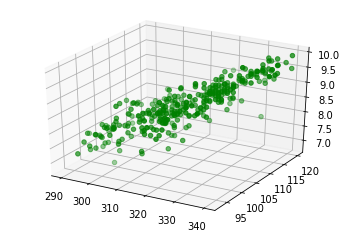

In [12]:
# Data visualization in 3D
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(x_train[:,0],x_train[:,1],x_train[:,2],c='g')
plt.show()

In [13]:
# 0.7 thresold taken to make class for predicting variable
pos,neg =(y_train>=0.7).reshape(len(x_train),1),(y_train<0.7).reshape(len(x_train),1)

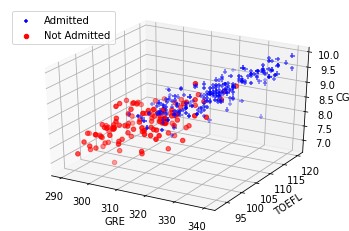

In [14]:
fig = plt.figure()
ax=plt.axes(projection = '3d')
ax.scatter(x_train[pos[:,0],0],x_train[pos[:,0],1],x_train[pos[:,0],2],c='b',marker='+',label="Admitted")
ax.scatter(x_train[neg[:,0],0],x_train[neg[:,0],1],x_train[neg[:,0],2],c='r',marker='o',label="Not Admitted")
ax.legend(loc="upper left")
ax.set_xlabel("GRE")
ax.set_ylabel("TOEFL")
ax.set_zlabel("CGPA")
plt.show()

In [15]:
# used to map data to [0,1] 
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [16]:
# used to calculate cost
def costfunction(theta,x,y):
    m=len(y)
    predictions= []
    error=0
    
    for i in range(m):
        predictions.append(sigmoid(np.dot(x[i],theta)))
        error+=((-y[i])*np.log(predictions[i])-(1-y[i])*np.log(1-predictions[i]))
    
    cost = (1/m)*error
    grad = (1/m) *np.dot(x.transpose(),(predictions-y))
    return cost,grad

In [17]:
# Update theta value and according calculate cost 
def gradientDescent(theta,x,y,alpha,iter_num):
    m=len(y) 
    cost_function_values =[]
    
    for i in range(iter_num):
        cost, grad = costfunction(theta,x,y)
        theta = theta - (alpha * grad)
        cost_function_values.append(cost)
        if(i%50==0):
            
            fig = plt.figure()
            ax = plt.axes(projection = '3d')
            ax.scatter(x[pos[:,0],1],x[pos[:,0],2],x[pos[:,0],3],c="b",marker="+")
            ax.scatter(x[neg[:,0],1],x[neg[:,0],2],x[neg[:,0],3],c="r",marker="x")
            
            x_value= np.array([np.min(x[:,1]),np.max(x[:,1])])
            y_value= -(theta[0] +theta[1]*x_value)/theta[2]
            ax.plot(x_value,y_value, "black")

            ax.set_xlabel("GRE")
            ax.set_ylabel("TOEFL")
            ax.set_zlabel("CGPA")
            plt.show()
            
    
    return theta,cost_function_values

In [18]:
# Used to convert higher(range of thousand) values to lower range
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std


In [19]:
# Normalization of Train Dataset
m , n = x_train.shape[0], x_train.shape[1]
x_train, x_train_mean, x_train_std = feature_normalization(x_train)
x_train= np.append(np.ones((m,1)),x_train,axis=1)      #axis=1 merge along column and axis=0 merge along row
y_train= y_train.reshape(m,1)
initial_theta = np.zeros((n+1,1)) 

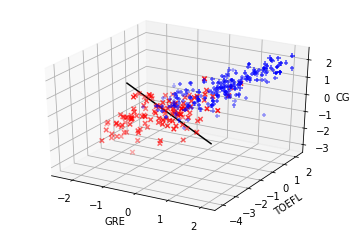

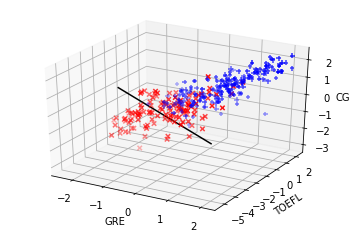

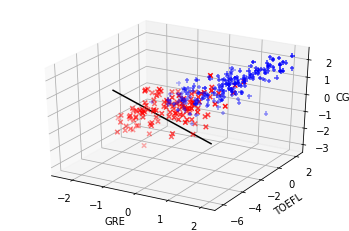

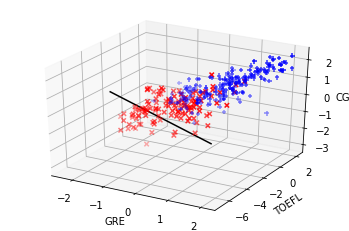

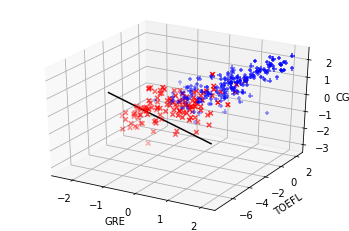

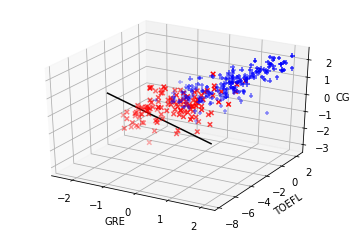

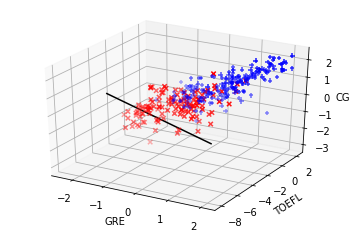

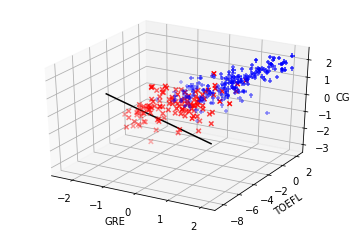

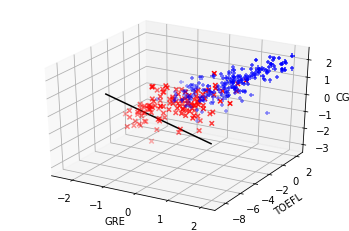

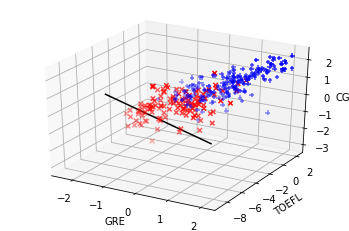

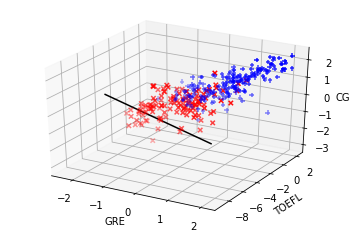

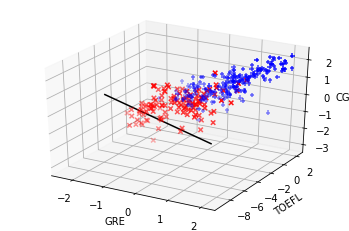

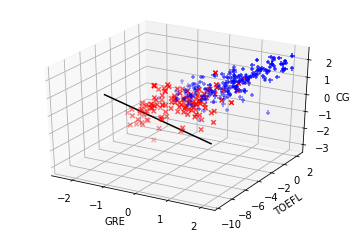

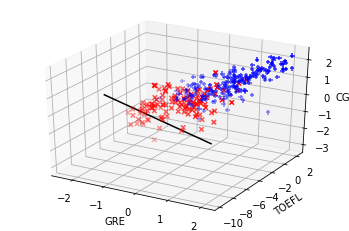

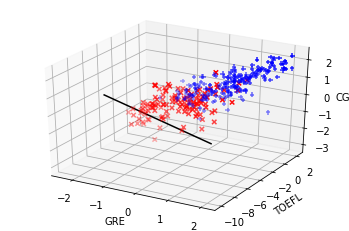

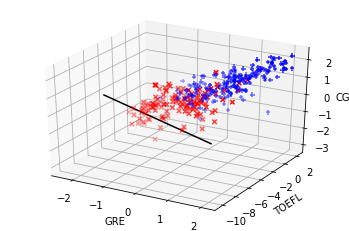

In [20]:
theta,cost_function_values=gradientDescent(initial_theta,x_train,y_train,0.05,800)

Text(0.5, 1.0, 'Cost function')

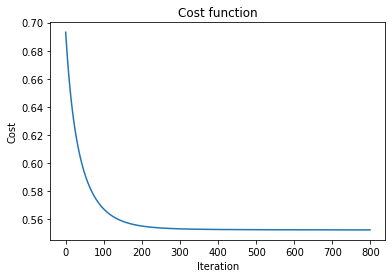

In [21]:
# Plotting Graph of Cost function
plt.plot(cost_function_values)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function")

**Model Testing Part**

In [22]:
# Normalization of Test Dataset
m1 , n1 = x_test.shape[0], x_test.shape[1]
x_test, x_test_mean, x_test_std = feature_normalization(x_test)
x_test= np.append(np.ones((m1,1)),x_test,axis=1)      #axis=1 is direction along column and axis 0 is direction along row
y_test=y_test.reshape(m1,1)

In [ ]:
# Test the Model
# Making Confusion Matrix
confusion_matrix=[[0,0],[0,0]]
for i in range(m1):
    predictions=sigmoid(np.dot(x_test[i],theta))
    if predictions>0.70:
        prediction = 1
    else:
        prediction = 0
    print(predictions,prediction,y_test[i])
    x = int((y_test[i][0]-1)**2)
    y = (prediction-1)**2
    confusion_matrix[x][y]+=1

In [24]:
#Print Confusion Matrix
#   TP  FP
#   FN  TP
for i in range(2):
    for j in range(2):
        print(confusion_matrix[i][j],end=' ')
    print()

51 29 
0 0 


In [25]:
#Accuracy = (TP + TN) /(TP + FP + TN + FN)
accuracy = (confusion_matrix[0][0]+confusion_matrix[1][1])/m1

#Recall = TP / (TP + FN)
recall = confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0])

#Precision = TP / (TP + FP)
precision = confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1])

#F1 Score = 2 * (Precision * Recall)/(Precision + Recall )
f1_score = 2 * (precision * recall)/(precision + recall)

print("Accuracy = ",accuracy)
print("Recall = ",recall)
print("Prediction = ",precision)
print("F1 Score = ",f1_score)

Accuracy =  0.6375
Recall =  1.0
Prediction =  0.6375
F1 Score =  0.7786259541984732
